### A program to find a, cloeset with f(x)
 - f(x) = sin(x)
 - g(x) = sin(ax)

In [2]:
import numpy as np
import sys

In [17]:
def func(x):
    return np.sin(x)


min_range = 0
max_range = np.pi
lr = 0.001
attempt = 10001
err = sys.float_info.epsilon

data_size = 10000
x_data = np.arange(min_range, max_range, (max_range - min_range)/data_size)
y_data = func(np.arange(min_range, max_range, (max_range - min_range)/data_size))
a = 2

In [4]:
def loss_func(a):
    return np.sin(a * x_data) - y_data


def loss_func_derivate(a):
    return x_data * np.cos(a * x_data) * np.sign(loss_func(a))


def loss(a):
    return np.mean(np.abs(loss_func(a)))


def gradient(a):
    return np.mean(loss_func_derivate(a))

In [18]:
for i in range(attempt):
    a = a - lr * gradient(a)
    y = loss(a)
    if np.abs(y) < err:
        break
    
    if i % 500 == 0:
        print("attempt {} : ({}, {})".format(i, a, y))

attempt 0 : (1.9999499176549003, 0.7957721971129438)
attempt 500 : (1.96037977934091, 0.79244675128245)
attempt 1000 : (1.8638326345593883, 0.7724782850116868)
attempt 1500 : (1.6139241055543478, 0.6380930042482958)
attempt 2000 : (1.1018639726256134, 0.1070083660327974)
attempt 2500 : (1.0007574193123052, 0.0007576274984742235)
attempt 3000 : (1.000471984526685, 0.00047203747220481775)
attempt 3500 : (1.0001863471721435, 0.0001863377182511975)
attempt 4000 : (0.9999008718107985, 9.910700875108224e-05)
attempt 4500 : (0.9996158577296854, 0.0003839976590686874)
attempt 5000 : (0.9993306505419892, 0.0006689883836434023)
attempt 5500 : (0.9990452489714319, 0.0009540801652666523)
attempt 6000 : (1.0007596317421676, 0.0007598414938669959)
attempt 6500 : (1.0004741986328998, 0.00047425242549698805)
attempt 7000 : (1.0001885625961546, 0.00018855326821361546)
attempt 7500 : (0.9999030849397228, 9.68944751423365e-05)
attempt 8000 : (0.999618072360395, 0.0003817843453895149)
attempt 8500 : (0.99

In [19]:
print("answer : ({}, {})".format(a, func(a)))

answer : (1.0004764161978654, 0.8417282980730787)


### To visualize the graph of loss

In [32]:
import matplotlib.pyplot as plt

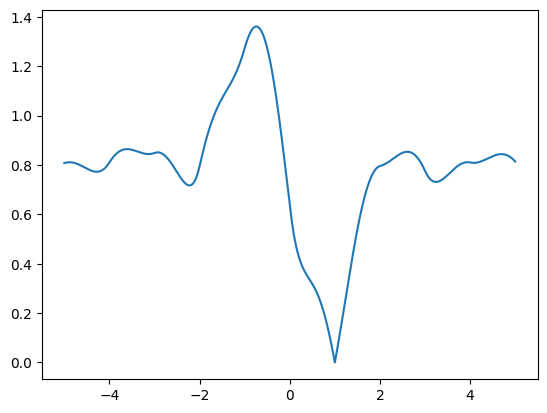

In [43]:
x = np.arange(-5, 5, 20 / data_size)
y = np.abs(np.array([loss(t) for t in x]))
plt.plot(x, y)
plt.show()